# Tutor Q4

A riveted joint, consisting of four rivets is subjected to an eccentric force, P of 5 kN act at the angle of 30 degree to the horizontal axis. Determine:

(i) The centroid of the rivets assembly from rivet 4

(ii) The forces at rivet 2 and 3

(iii) The maximum shear stress if A is 510 mm2

Given:
- Area of rivet 1= A
- Area of rivet 2= 2A
- Area of rivet 3= A
- Area of rivet 4= 4A

In [157]:
# Required
import matplotlib.pyplot as plt
import numpy as np
from math import pi, radians, degrees, dist, atan, sqrt, cos, sin, hypot

In [158]:
# Info from question
coorA = [100,100]
coorB = [200,0]
coorC = [100,-100]
coorD = [0,0]
PLoad = 5000
loadAngle = 30
CentroidToLoad = 225

# Different area
areaA = 1
areaB = 2*areaA
areaC = areaA
areaD = 4*areaA

In [159]:
print('1. Centroid ')

# Different area
xBar = ((coorA[0]*areaA)+(coorB[0]*areaB)+(coorC[0]*areaC)+(coorD[0]*areaD))/(areaA+areaB+areaC+areaD)
yBar = ((coorA[1]*areaA)+(coorB[1]*areaB)+(coorC[1]*areaC)+(coorD[1]*areaD))/(areaA+areaB+areaC+areaD)
print(f'x bar = {xBar}')
print(f'y bar = {yBar}')
print(f'Centroid is ({xBar},{yBar}) from Bolt D')


1. Centroid 
x bar = 75.0
y bar = 0.0
Centroid is (75.0,0.0) from Bolt D


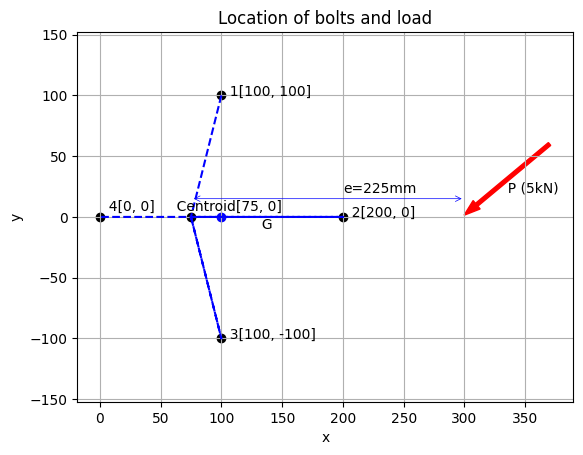

In [160]:
centroid = [75,0]
loadLocation = [300,0]
PLoad = 5000

data = np.array([coorA,coorB,coorC,coorD,centroid])
x, y = data.T
fig, ax = plt.subplots()
ax.grid()
ax.scatter(x,y, color='k')
ax.scatter(100,0, color='b')
x_line=[coorA[0],centroid[0],coorB[0],centroid[0],coorC[0],centroid[0],coorD[0]]
y_line=[coorA[1],centroid[1],coorB[1],centroid[1],coorC[1],centroid[1],coorD[1]]
ax.plot(x_line, y_line, color='b', linestyle='--')
ax.arrow(loadLocation[0]+70,loadLocation[1]+60, -60,-50,width=3,color='r')
# ax.hlines(Fproof,0,10000)
# ax.hlines(Fi,0,10000)

ax.set(xlabel='x', ylabel='y',
       title='Location of bolts and load')

ax.text(coorA[0],coorA[1],f'  1{coorA}')
ax.text(coorB[0],coorB[1],f'  2{coorB}')
ax.text(coorC[0],coorC[1],f'  3{coorC}')
ax.text(coorD[0],coorD[1]+5,f'  4{coorD}     Centroid{centroid}')
ax.text(coorD[0],coorD[1]-10,f'                                     G')
ax.text(loadLocation[0],loadLocation[1]+20,f'          P (5kN)')

ax.text(coorB[0],coorB[1]+20,f'e=225mm')

ax.annotate("",
            xy=(300, 15),  # End point of the arrow
            xytext=(75, 15),  # Start point of the arrow
            arrowprops=dict(arrowstyle="<->",  # Double-headed arrow style
                            color="blue",
                            linewidth=0.5))

plt.axis('equal')
plt.show()

In [161]:
print('2. Find distance between bolts and centroid')
Centroid = [xBar, yBar]
rA = dist(coorA, Centroid)
rB = dist(coorB, Centroid)
rC = dist(coorC, Centroid)
rD = dist(coorD, Centroid)
print(f'rA = {rA}')
print(f'rB = {rB}')
print(f'rC = {rC}')
print(f'rD = {rD}')

2. Find distance between bolts and centroid
rA = 103.07764064044152
rB = 125.0
rC = 103.07764064044152
rD = 75.0


In [169]:
print('3. Find Tangential Force')
directShear = PLoad/4
shearAngle=pi/6
print(f'Direct shear, P/4 = {directShear}')
# Fta = (CentroidToLoad*rA)/(sum(i*i for i in [rA,rB,rC]))
# print(f'Tangential Force at A, Fta = {Fta:.1f}N')
PLoad_y = round(PLoad * cos(radians(loadAngle)),0)
PLoad_x = round(PLoad * sin(radians(loadAngle)),0)
print(f'PLoad_y = {PLoad_y}')
print(f'PLoad_x = {PLoad_x}')
Fta = (PLoad_y*CentroidToLoad*rA)/(sum(i*i for i in [rA,rB,rC,rD]))
print(f'Tangential Force at Rivet 1, Ft1 = {Fta}')

3. Find Tangential Force
Direct shear, P/4 = 1250.0
PLoad_y = 4330.0
PLoad_x = 2500.0
Tangential Force at Rivet 1, Ft1 = 2362.9033269164743


In [170]:
Ftb = (PLoad_y*CentroidToLoad*rB)/(sum(i*i for i in [rA,rB,rC,rD]))
print(f'Tangential Force at Rivet 2, Ft2 = {Ftb}')

Tangential Force at Rivet 2, Ft2 = 2865.4411764705883


In [171]:
Ftc = (PLoad_y*CentroidToLoad*rC)/(sum(i*i for i in [rA,rB,rC,rD]))
print(f'Tangential Force at Rivet 3, Ft3 = {Ftc}')

Tangential Force at Rivet 3, Ft3 = 2362.9033269164743


In [172]:
Ftd = (PLoad_y*CentroidToLoad*rD)/(sum(i*i for i in [rA,rB,rC,rD]))
print(f'Tangential Force at Rivet 4, Ft4 = {Ftd}')

Tangential Force at Rivet 4, Ft4 = 1719.264705882353


In [173]:
tangentialAngle = degrees(atan(100/(100-centroid[0])))
print(f'Tangential angle = {tangentialAngle} degrees')

Tangential angle = 75.96375653207353 degrees


4. Resultant load at each bolt


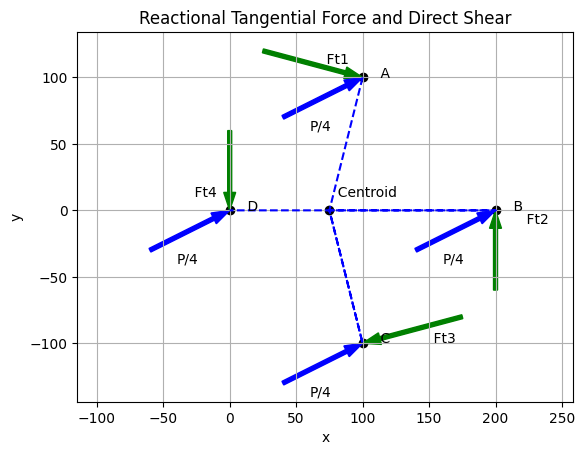

In [174]:
print('4. Resultant load at each bolt')

fig, ax = plt.subplots()
ax.grid()
ax.scatter(x,y, color='k')
x_line=[coorA[0],centroid[0],coorB[0],centroid[0],coorC[0],centroid[0],coorD[0]]
y_line=[coorA[1],centroid[1],coorB[1],centroid[1],coorC[1],centroid[1],coorD[1]]
ax.plot(x_line, y_line, color='b', linestyle='--')
# ax.arrow(loadLocation[0],loadLocation[1]+60, 0,-50,width=3,color='r')
ax.arrow(coorA[0]-75,coorA[1]+20, 75,-20,width=3,color='g', length_includes_head='False')
ax.arrow(coorB[0],coorB[1]-60, 0,60,width=3,color='g', length_includes_head='False')
ax.arrow(coorC[0]+75,coorC[1]+20, -75,-20,width=3,color='g', length_includes_head='False')
ax.arrow(coorD[0],coorD[1]+60, 0,-60,width=3,color='g', length_includes_head='False')

# Direct Shear
for i in [coorA,coorB,coorC,coorD]:
       ax.arrow(i[0]-60,i[1]-30, 60,30,width=3,color='b', length_includes_head='False')
       # ax.text(i[0],i[1],f'    {i}')

ax.set(xlabel='x', ylabel='y',
       title='Reactional Tangential Force and Direct Shear')

coorBolts = [coorA,coorB,coorC,coorD]
boltLabel = ['A','B','C','D']
for i in range(4):
       ax.text(coorBolts[i][0],coorBolts[i][1],f'    {boltLabel[i]}')
       ax.text(coorBolts[i][0]-40,coorBolts[i][1]-40,f'P/4')

ax.text(centroid[0],centroid[1]+10,f'  Centroid')
ax.text(coorBolts[0][0]-40,coorBolts[0][1]+10,f'    Ft1')
ax.text(coorBolts[1][0]+10,coorBolts[1][1]-10,f'    Ft2')
ax.text(coorBolts[2][0]+40,coorBolts[2][1],f'    Ft3')
ax.text(coorBolts[3][0]-40,coorBolts[3][1]+10,f'    Ft4')

plt.axis('equal')
plt.show()

In [179]:
print(f'Shear force angle = {degrees(shearAngle)} degrees')
F_ax=round(Fta*cos(radians(tangentialAngle))+directShear*cos(shearAngle),0)
F_ay=round(Fta*sin(radians(tangentialAngle))+directShear*sin(shearAngle),0)
print(f'F_ax= {F_ax}N')
print(f'F_ay= {F_ay}N')
F_A = round(hypot(F_ax,F_ay),0)
print(f'F_A= {F_A}N')

Shear force angle = 29.999999999999996 degrees
F_ax= 1656.0N
F_ay= 2917.0N
F_A= 3354.0N
